In [1]:
import numpy as np
import matplotlib.pyplot as plt

(0.0, 80.0)

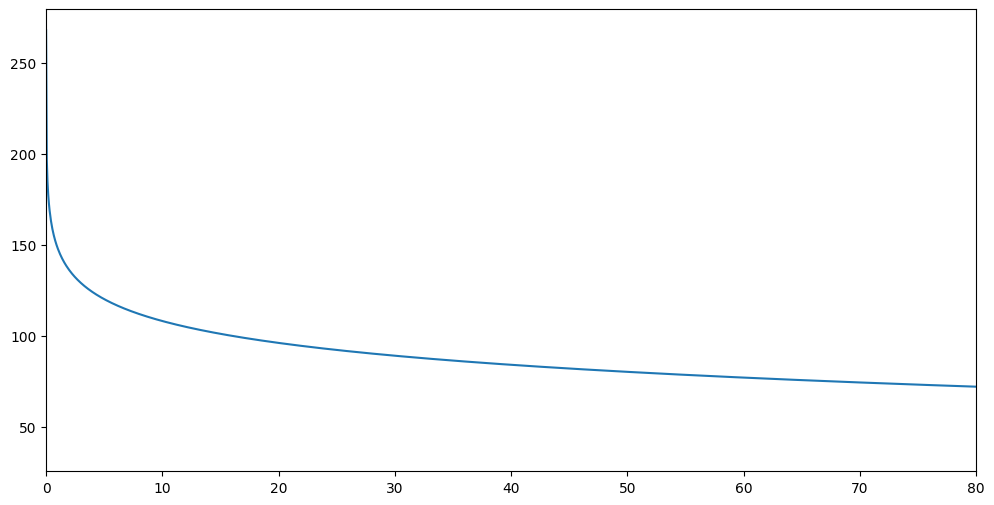

In [28]:
f = np.linspace(0.001,0.6e3,10000)
w = 2*np.pi*f
s = 1j*w


Rin = 100e3
Rf = 1e3
Cf = 0.01e-6
L = 100e-3

Zf = (1/(s*Cf)) + Rf
Zin = s*L

H = -(Zf)/(Zin)

plt.figure(figsize=(12,6))
plt.plot(f, 20*np.log10(abs(H)))
plt.xlim([0,80])
# plt.ylim([-40,80])

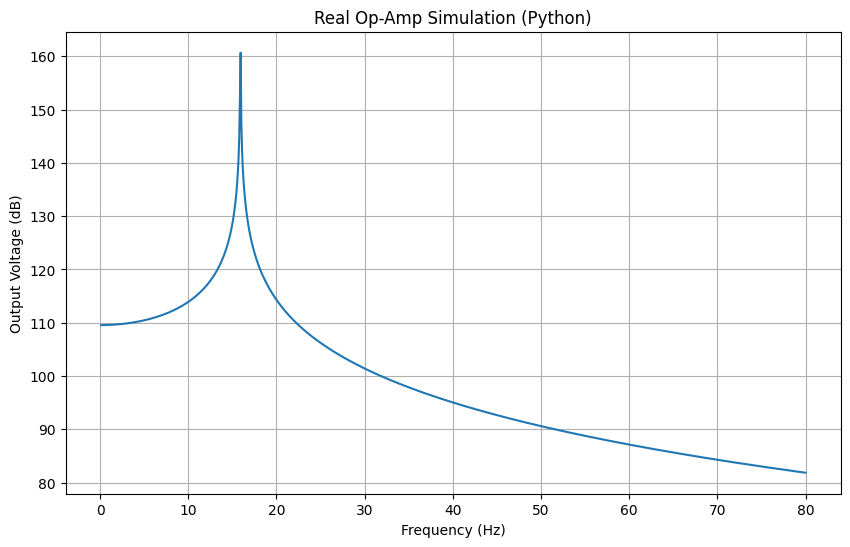

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Use the same frequency range as your visual QSPICE graph
# (The QSPICE graph appears to be linear 0-80Hz based on the ticks)
f = np.linspace(0.1, 80, 1000) 
w = 2*np.pi*f
s = 1j*w

# Component Values
Rin_is_L = 100e-3 # 100mH Inductor
Rf = 1e3
Cf = 0.01e-6

# Source Voltage (From QSPICE V7)
Vin = 3 

# Op-Amp Limitations (From QSPICE Schematic Text)
A_vol = 100000  # "Avol=100K"

# Impedance Calculations
Zf = (1/(s*Cf)) + Rf
Zin = s * Rin_is_L

# --- THE FIX ---
# Calculate the Ideal Closed Loop Gain
Beta = Zin / (Zin + Zf) # Feedback Factor
Ideal_Gain = -Zf / Zin

# Apply the "Real" Op-Amp Transfer Function
# Formula: H_real = Ideal_Gain / (1 + (1/Loop_Gain))
# Where Loop_Gain = A_vol * Beta
Loop_Gain = A_vol * Beta
H_real = Ideal_Gain / (1 + (1/Loop_Gain))

# Calculate Final Output Voltage
Vout = H_real * Vin

plt.figure(figsize=(10,6))
plt.plot(f, 20*np.log10(np.abs(Vout)))
plt.title("Real Op-Amp Simulation (Python)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage (dB)")
plt.grid(True)
plt.show()